In [1]:
%matplotlib inline

In [2]:
def unit_vector(A,B):
    # Calculate the unit vector from A to B 

    dist = distance.euclidean(A,B)

    return ((B[0]-A[0])/dist,(B[1]-A[1])/dist)

def calc_force(l, myosin,b):

    return 10*(l-1) + b*myosin

def d_pos(position,force,dt):

    x_new = position[0] + (dt/const.eta)*force[0]

    y_new = position[1] + (dt/const.eta)*force[1]

    return (x_new,y_new)

def CellArea(corners):
    n = len(corners) # of corners
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area


In [159]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.spatial import distance
#import globals as const

def tissue():
    r = 7.6
    xx = np.arange(0,15*r,r)
    yy = np.arange(0,11*r*np.sqrt(3)*0.5,r*np.sqrt(3)*0.5)
    points = list(itertools.product(xx,yy))

    # shear the points
    m = np.sqrt(3)/3

    new_points = []
    for i in range(0,len(points)):
        x = points[i][0] + m*points[i][1]
        y = points[i][1]
        new_points.append((x,y))  

    points = new_points

    G = nx.Graph()
    for i in range(0,len(points)):
        G.add_node(i,pos=points[i])

    section_1 = [0,1,2,3,4,11,12,13,14,22,23,24,25,33,34,35,44,45,46,55,56,66,67,77,88]
    section_2 = [121,132,133,143,144,145,154,155,156,157]
    section_3 = [7,8,9,10,19,20,21,31,32,43]
    section_4 = [76,87,98,109,120,131,142,153,164,97,108,119,130,141,152,163,118,129,140,151,162,139,150,161,160]

    G.remove_nodes_from(section_1)
    G.remove_nodes_from(section_2)
    G.remove_nodes_from(section_3)
    G.remove_nodes_from(section_4)

    G = nx.convert_node_labels_to_integers(G,first_label=0)

    G.add_path([0,1,4,7,6,2,0],beta=0,myosin=0,color='r')
    G.add_path([6,11,18,19,13,7],beta=0,myosin=0,color='r')
    G.add_path([18,26,35,36,28,19],beta=0,myosin=0,color='r')
    G.add_path([4,5,9,14,13],beta=0,myosin=0,color='r')
    G.add_path([14,21,29,28],beta=0,myosin=0,color='r')
    G.add_path([9,10,16,22,21],beta=0,myosin=0,color='r')
    G.add_path([22,31,39,38,29],beta=0,myosin=0,color='r')
    G.add_path([38,46,45,36],beta=0,myosin=0,color='r')
    G.add_path([35,43,52,53,45],beta=0,myosin=0,color='r')
    G.add_path([31,32,24,17,16],beta=0,myosin=0,color='r')
    G.add_path([32,41,42,34,25,24],beta=0,myosin=0,color='r')
    G.add_path([39,48,49,41],beta=0,myosin=0,color='r')
    G.add_path([46,55,56,48],beta=0,myosin=0,color='r')
    G.add_path([53,62,63,55],beta=0,myosin=0,color='r')
    G.add_path([52,60,69,70,62],beta=0,myosin=0,color='r')
    G.add_path([70,77,78,72,63],beta=0,myosin=0,color='r')
    G.add_path([72,73,65,56],beta=0,myosin=0,color='r')
    G.add_path([65,66,58,49],beta=0,myosin=0,color='r')
    G.add_path([58,59,51,42],beta=0,myosin=0,color='r')
    G.add_path([66,75,76,68,59],beta=0,myosin=0,color='r')
    G.add_path([73,80,81,75],beta=0,myosin=0,color='r')
    G.add_path([78,84,85,80],beta=0,myosin=0,color='r')
    G.add_path([81,87,88,83,76],beta=0,myosin=0,color='r')
    G.add_path([85,89,90,87],beta=0,myosin=0,color='r')
    G.add_path([90,93,94,92,88],beta=0,myosin=0,color='r')


    G.add_edges_from([(3,0),(3,1),(3,4),(3,7),(3,6),(3,2)],beta=10,myosin=1000)
    G.add_edges_from([(8,14),(8,9),(8,5),(8,4),(8,7),(8,13)],beta=10,myosin=1000)
    G.add_edges_from([(12,19),(12,13),(12,7),(12,6),(12,11),(12,18)],beta=10,myosin=1000)
    G.add_edges_from([(15,22),(15,16),(15,10),(15,9),(15,14),(15,21)],beta=10,myosin=1000)
    G.add_edges_from([(20,29),(20,21),(20,14),(20,13),(20,19),(20,28)],beta=10,myosin=1000)
    G.add_edges_from([(27,36),(27,28),(27,19),(27,18),(27,26),(27,35)],beta=10,myosin=1000)
    G.add_edges_from([(23,32),(23,24),(23,17),(23,16),(23,22),(23,31)],beta=10,myosin=1000)
    G.add_edges_from([(30,39),(30,31),(30,22),(30,21),(30,29),(30,38)],beta=10,myosin=1000)
    G.add_edges_from([(37,46),(37,38),(37,29),(37,28),(37,36),(37,45)],beta=10,myosin=1000)
    G.add_edges_from([(44,53),(44,45),(44,36),(44,35),(44,43),(44,52)],beta=10,myosin=1000)
    G.add_edges_from([(33,42),(33,34),(33,25),(33,24),(33,32),(33,41)],beta=10,myosin=1000)
    G.add_edges_from([(40,49),(40,41),(40,32),(40,31),(40,39),(40,48)],beta=10,myosin=1000)
    G.add_edges_from([(47,56),(47,48),(47,39),(47,38),(47,46),(47,55)],beta=10,myosin=1000)
    G.add_edges_from([(54,63),(54,55),(54,46),(54,45),(54,53),(54,62)],beta=10,myosin=1000)
    G.add_edges_from([(61,70),(61,62),(61,53),(61,52),(61,60),(61,69)],beta=10,myosin=1000)
    G.add_edges_from([(50,59),(50,51),(50,42),(50,41),(50,49),(50,58)],beta=10,myosin=1000)
    G.add_edges_from([(57,66),(57,58),(57,49),(57,48),(57,56),(57,65)],beta=10,myosin=1000)
    G.add_edges_from([(64,73),(64,65),(64,56),(64,55),(64,63),(64,72)],beta=10,myosin=1000)
    G.add_edges_from([(71,78),(71,72),(71,63),(71,62),(71,70),(71,77)],beta=10,myosin=1000)
    G.add_edges_from([(67,76),(67,68),(67,59),(67,58),(67,66),(67,75)],beta=10,myosin=1000)
    G.add_edges_from([(74,81),(74,75),(74,66),(74,65),(74,73),(74,80)],beta=10,myosin=1000)
    G.add_edges_from([(79,85),(79,80),(79,73),(79,72),(79,78),(79,84)],beta=10,myosin=1000)
    G.add_edges_from([(82,88),(82,83),(82,76),(82,75),(82,81),(82,87)],beta=10,myosin=1000)
    G.add_edges_from([(86,90),(86,87),(86,81),(86,80),(86,85),(86,89)],beta=10,myosin=1000)
    G.add_edges_from([(91,94),(91,92),(91,88),(91,87),(91,90),(91,93)],beta=10,myosin=1000)

    nx.set_node_attributes(G, 'time_lag', 0)
    
    centers = [3,8,12,15,20,27,23,30,37,44,33,40,47,54,61,50,57,64,71,67,74,79,82,86,91]
    
    for j in centers:
        G.node[j]['time_lag'] = np.random.randint(0,2000)
    
    return G

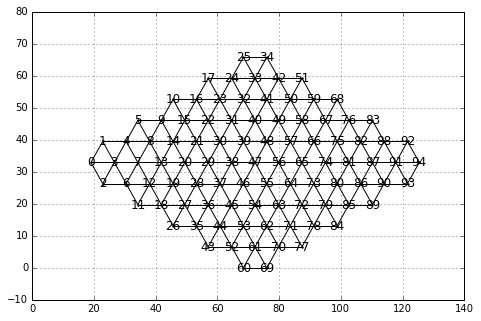

In [160]:
G = tissue()
pos = nx.get_node_attributes(G,'pos')
nx.draw(G,pos, with_labels=True,node_size=2)
plt.axis("on")
plt.grid("on")

plt.show()

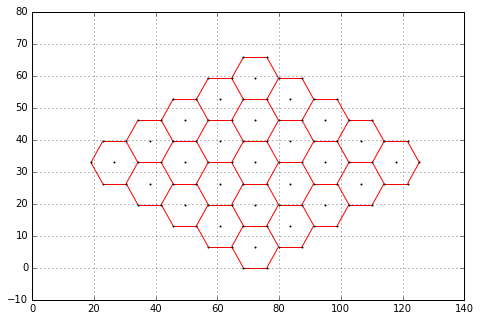

In [161]:
pos = nx.get_node_attributes(G,'pos')
edges,colors = zip(*nx.get_edge_attributes(G,'color').items())
nx.draw(G,pos, node_size = 1, edgelist=edges,edge_color=colors,width=1)
plt.axis("on")
plt.grid("on")

plt.show()

In [162]:
node_dict = nx.get_node_attributes(G,'pos')

In [163]:
distance.euclidean(node_dict[0],node_dict[1])

7.6000000000000005

In [164]:
distance.euclidean(node_dict[0],node_dict[3])

7.599999999999998

In [165]:
distance.euclidean(node_dict[0],node_dict[2])

7.6000000000000005

In [166]:
distance.euclidean(node_dict[25],node_dict[33])

7.599999999999999

In [167]:
distance.euclidean(node_dict[24],node_dict[33])

7.599999999999994

In [168]:
distance.euclidean(node_dict[25],node_dict[24])

7.599999999999999

In [169]:
nodes = nx.get_node_attributes(G,'pos')
centers = [3,8,12,15,20,27,23,30,37,44,33,40,47,54,61,50,57,64,71,67,74,79,82,86,91]
len(centers)

25

In [170]:
outer = []
for neighbor in G.neighbors(3):
    outer.append(nodes[neighbor])
print(outer)    

[(18.999999999999996, 32.908965343808667), (22.799999999999997, 39.490758412570401), (22.799999999999997, 26.327172275046934), (30.399999999999999, 39.490758412570401), (30.399999999999999, 26.327172275046934), (34.199999999999996, 32.908965343808667)]


In [196]:
for n in centers:
    corners = [neighbor for neighbor in G.neighbors(n)]
    corn_sort = [(corners[0],0)]
    u = unit_vector(nodes[n],nodes[corners[0]])
    for i in range(1,len(corners)):
        v = unit_vector(nodes[n],nodes[corners[i]])
        dot = np.dot(u,v)
        det = np.linalg.det([u,v])
        angle = np.arctan2(det,dot)
        corn_sort.append((corners[i],angle))
    corn_sort = sorted(corn_sort, key=lambda tup: tup[1])
    corn2 = [nodes[entry[0]] for entry in corn_sort]
#     print(n,CellArea(corn2))

    for j in range(0,len(corn2)):
        inner = [corn2[np.mod(j,6)],corn2[np.mod(j+1,6)],nodes[n],corn2[np.mod(j-1,6)]]
        
        print(CellArea(inner)/CellArea(corn2))
        

0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.33333333

In [172]:
corn2

[(121.59999999999999, 39.490758412570401),
 (113.99999999999999, 39.490758412570401),
 (110.19999999999999, 32.908965343808667),
 (114.0, 26.327172275046934),
 (121.59999999999999, 26.327172275046934),
 (125.39999999999999, 32.908965343808667)]

In [173]:
corn_sort

[(92, -2.0943951023931953),
 (88, -1.0471975511965965),
 (87, 0),
 (90, 1.0471975511965981),
 (93, 2.0943951023931953),
 (94, 3.1415926535897931)]

In [174]:
corn3 = [j[0] for j in corn_sort]
print(corn3)

[92, 88, 87, 90, 93, 94]


In [190]:
for n in centers:
    for j in range(0,len(corn2)):
        inner = [corn2[np.mod(j+1,6)],corn2[np.mod(j-1,6)],nodes[n]]
        print(corn_sort[np.mod(j+1,6)][0],corn_sort[np.mod(j-1,6)][0],n)
#         print(CellArea(inner))

88 94 3
87 92 3
90 88 3
93 87 3
94 90 3
92 93 3
88 94 8
87 92 8
90 88 8
93 87 8
94 90 8
92 93 8
88 94 12
87 92 12
90 88 12
93 87 12
94 90 12
92 93 12
88 94 15
87 92 15
90 88 15
93 87 15
94 90 15
92 93 15
88 94 20
87 92 20
90 88 20
93 87 20
94 90 20
92 93 20
88 94 27
87 92 27
90 88 27
93 87 27
94 90 27
92 93 27
88 94 23
87 92 23
90 88 23
93 87 23
94 90 23
92 93 23
88 94 30
87 92 30
90 88 30
93 87 30
94 90 30
92 93 30
88 94 37
87 92 37
90 88 37
93 87 37
94 90 37
92 93 37
88 94 44
87 92 44
90 88 44
93 87 44
94 90 44
92 93 44
88 94 33
87 92 33
90 88 33
93 87 33
94 90 33
92 93 33
88 94 40
87 92 40
90 88 40
93 87 40
94 90 40
92 93 40
88 94 47
87 92 47
90 88 47
93 87 47
94 90 47
92 93 47
88 94 54
87 92 54
90 88 54
93 87 54
94 90 54
92 93 54
88 94 61
87 92 61
90 88 61
93 87 61
94 90 61
92 93 61
88 94 50
87 92 50
90 88 50
93 87 50
94 90 50
92 93 50
88 94 57
87 92 57
90 88 57
93 87 57
94 90 57
92 93 57
88 94 64
87 92 64
90 88 64
93 87 64
94 90 64
92 93 64
88 94 71
87 92 71
90 88 71
93 87 71
94 9

In [176]:
G[n][corn_sort[j][0]]['myosin']

1000

In [177]:
centers = [3,8,12,15,20,27,23,30,37,44,33,40,47,54,61,50,57,64,71,67,74,79,82,86,91]

In [178]:
G.node[3]['time_lag']

1785

In [179]:
G.node[37]['time_lag']

1000

In [152]:
np.random.randint(0,2000)

1065